In [1]:
from __future__ import absolute_import, division, print_function
import pandas as pd

import os
import sys
import datetime

# import data analysis modules
import openbadge_analysis as ob
import openbadge_analysis.core

In [2]:
# Bokeh
from bokeh.io import output_notebook
from bokeh.charts import show

import openbadge_analysis.visualization.contribution as contribution
import openbadge_analysis.visualization.participation as participation
import openbadge_analysis.visualization.participation_interactive as participation_interactive

In [3]:
output_notebook()

Loading BokehJS ...

In [4]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid")

In [5]:
log_file_path = '../data/meeting_data/sample_meeting.txt'
# Generate names for badge (or you can enter manually)

meeting_name = "Sample"

In [6]:
# Read data
df_meeting = ob.core.sample2data(log_file_path)

# Create speaking intervals
df_stitched = ob.core.make_df_stitched(df_meeting)  # Data for speaking intervals

In [7]:
print("Meeting data:")
print(df_meeting.head())
print("\n\n")
print("Stitched data:")
print(df_stitched.head())

Meeting data:
                                    num_samples  signal   voltage
member     datetime                                              
8JB8GZYFVW 2016-08-05 08:15:20.950        114.0    25.0  2.945455
           2016-08-05 08:15:21.000        114.0     7.0  2.945455
           2016-08-05 08:15:21.050        114.0     7.0  2.945455
           2016-08-05 08:15:21.100        114.0   113.0  2.945455
           2016-08-05 08:15:21.150        114.0   105.0  2.945455



Stitched data:
member                   8JB8GZYFVW  9LLE6DZUPU  B7H6NPMKQT  QNT3BBQ0X1  \
datetime                                                                  
2016-08-05 08:15:14.050       False       False       False       False   
2016-08-05 08:15:14.100       False       False       False       False   
2016-08-05 08:15:14.150       False       False       False       False   
2016-08-05 08:15:14.200       False       False       False       False   
2016-08-05 08:15:14.250       False       False       Fa

In [8]:
# Generate names for badge (or you can enter manually)
member_keys = list(df_stitched.columns.values)
member_names = {x[1]:'member_'+str(x[0]) for x in enumerate(member_keys)}

'''
member_names = {
    'B7H6NPMKQT': 'Brittany',
    '8JB8GZYFVW': 'Shirley',
    'TYCN86EZ5F': 'Don',
    'TZPQ1AKVD2': 'Aaron',
    '9LLE6DZUPU': 'Alexander',
    'QNT3BBQ0X1': 'Otto'
}
'''

member_names


{u'8JB8GZYFVW': 'member_0',
 u'9LLE6DZUPU': 'member_1',
 u'B7H6NPMKQT': 'member_2',
 u'QNT3BBQ0X1': 'member_3',
 u'TYCN86EZ5F': 'member_4',
 u'TZPQ1AKVD2': 'member_5'}

# Seaborn Examples
Simple examples using Seaborn/Matplotlib

In [9]:
# Calculate percentage of speaking time
speaking_time = df_stitched.sum()
speaking_time = speaking_time.to_frame('intervals').reset_index()#.pivot(columns='member',values='intervals')

speaking_intervals_total = speaking_time.intervals.sum()

speaking_time['p'] = speaking_time['intervals']/speaking_intervals_total
# add member name
member_names_df = pd.DataFrame(index=member_names.keys(), data=member_names.values(), columns=['member_name'])
speaking_time = speaking_time.join(member_names_df, on='member')

speaking_time

,member,intervals,p,member_name
0,8JB8GZYFVW,18385,0.220037,member_0
1,9LLE6DZUPU,9564,0.114465,member_1
2,B7H6NPMKQT,3354,0.040142,member_2
3,QNT3BBQ0X1,12789,0.153063,member_3
4,TYCN86EZ5F,14883,0.178124,member_4
5,TZPQ1AKVD2,24579,0.294169,member_5


[Text(0,0,'member_0'),
 Text(0,0,'member_1'),
 Text(0,0,'member_2'),
 Text(0,0,'member_3'),
 Text(0,0,'member_4'),
 Text(0,0,'member_5')]

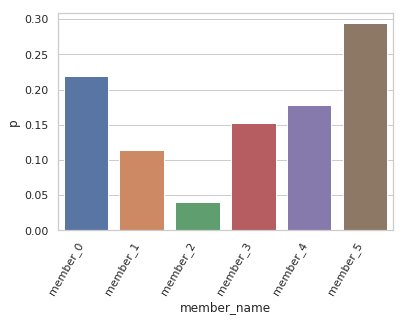

In [10]:
ax = sns.barplot(x="member_name", y="p", data=speaking_time)
ax.set_xticklabels(labels = ax.get_xticklabels(), rotation=60, ha='right')

# Bokeh Examples
More complex examples that uses the Bokeh library. Note that the Bokeh version we use for these examples are quite old, and that newer versions might not support these types of figures.

In [13]:
# Generate contribution graph
plot = contribution.contribution_plot(df_stitched, meeting_name, member_names=member_names)
show(plot)

/home/orenled/.virtualenvs/openbadge-analysis-examples/local/lib/python2.7/site-packages/bokeh/core/json_encoder.py:33: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  if pd and isinstance(obj, pd.tslib.Timestamp):
/home/orenled/.virtualenvs/openbadge-analysis-examples/local/lib/python2.7/site-packages/bokeh/core/json_encoder.py:35: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(type(obj), np.float):
/home/orenled/.virtualenvs/openbadge-analysis-examples/local/lib/python2.7/site-packages/bokeh/core/json_encoder.py:37: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  elif np.issubdtype(type(obj), np.int):


In [14]:
plot = participation.participation_plot(df_stitched_all=[[df_stitched]], labels=[meeting_name],
                                         member_names=member_names)
show(plot)